In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [3]:
# Load dataset
df = pd.read_csv('supply_chain_data.csv')


In [5]:
# Data Cleaning
# Remove duplicates
df = df.drop_duplicates()

In [7]:
# Check and handle missing values (if any)
df = df.dropna()

In [9]:
# Convert dates to datetime format
df['ShipmentDate'] = pd.to_datetime(df['ShipmentDate'], dayfirst=True, errors='coerce')
df['DeliveryDate'] = pd.to_datetime(df['DeliveryDate'], dayfirst=True, errors='coerce')

In [11]:
# Create DeliveryTime column
df['DeliveryTime'] = (df['DeliveryDate'] - df['ShipmentDate']).dt.days

In [15]:
# Shipment Volume Insights
df['Month'] = df['ShipmentDate'].dt.to_period('M')
shipments_per_month = df['Month'].value_counts().sort_index()
quantity_by_warehouse = df.groupby('Warehouse')['Quantity'].sum()
top_5_products = df['Product'].value_counts().nlargest(5)


In [17]:
# Revenue Analysis
df['Revenue'] = df['Quantity'] * df['UnitCost']

In [19]:
# Supplier and Warehouse Analysis
shipments_per_supplier = df['Supplier'].value_counts()
delivery_time_supplier = df.groupby('Supplier')['DeliveryTime'].describe()

In [25]:
print(shipments_per_supplier)
print(delivery_time_supplier)

Supplier
GadgetPro    462
NetSys       405
TechCorp     384
Digitron     377
Innovatek    372
Name: count, dtype: int64
           count      mean       std  min  25%  50%  75%   max
Supplier                                                      
Digitron   377.0  5.676393  3.007314  1.0  3.0  6.0  8.0  10.0
GadgetPro  462.0  5.497835  2.972578  1.0  3.0  6.0  8.0  10.0
Innovatek  372.0  5.473118  2.834487  1.0  3.0  6.0  8.0  10.0
NetSys     405.0  5.414815  2.970278  1.0  3.0  5.0  8.0  10.0
TechCorp   384.0  5.580729  2.835571  1.0  3.0  6.0  8.0  10.0


In [27]:
# Time Series Analysis

weekly_volume = df.set_index('ShipmentDate').resample('W').size()
monthly_cost_trend = df.set_index('ShipmentDate').resample('M')['UnitCost'].mean()

C:\Users\vansh\AppData\Local\Temp\ipykernel_2844\2669970992.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_cost_trend = df.set_index('ShipmentDate').resample('M')['UnitCost'].mean()


In [31]:
weekly_volume.head()

ShipmentDate
2023-01-01     7
2023-01-08    34
2023-01-15    42
2023-01-22    47
2023-01-29    44
Freq: W-SUN, dtype: int64

In [33]:
monthly_cost_trend

ShipmentDate
2023-01-31    762.749783
2023-02-28    692.729367
2023-03-31    802.100520
2023-04-30    807.357748
2023-05-31    790.686788
2023-06-30    747.218742
2023-07-31    795.219036
2023-08-31    742.033274
2023-09-30    750.518737
2023-10-31    769.175425
2023-11-30    781.841279
2023-12-31    753.638571
Freq: ME, Name: UnitCost, dtype: float64

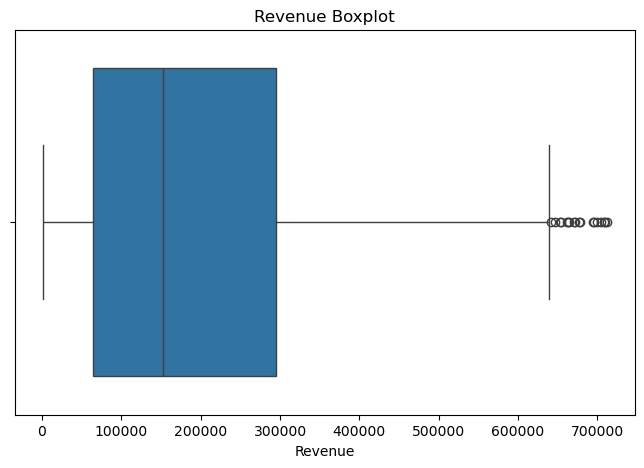

In [35]:
# Outlier Detection & Treatment
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Revenue'])
plt.title('Revenue Boxplot')
plt.show()

In [37]:
# Optional: Cap outliers using IQR
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['Revenue'] = df['Revenue'].clip(lower, upper)

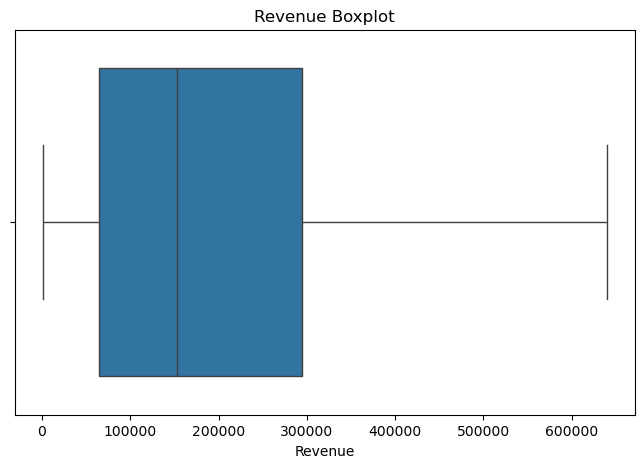

In [41]:
#boxplot after treatment of outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Revenue'])
plt.title('Revenue Boxplot')
plt.show()

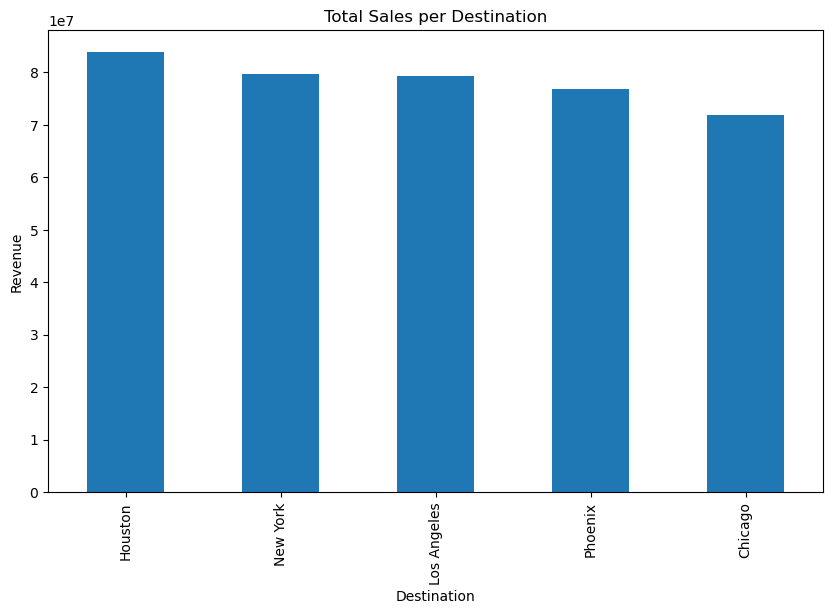

In [43]:
# Visualization Tasks
# Bar Chart for Total Sales Per Destination
sales_per_destination = df.groupby('Destination')['Revenue'].sum().sort_values(ascending=False)
sales_per_destination.plot(kind='bar', figsize=(10,6), title='Total Sales per Destination')
plt.ylabel('Revenue')
plt.show()

C:\Users\vansh\AppData\Local\Temp\ipykernel_2844\577784041.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('ShipmentDate').resample('M')['Revenue'].sum()


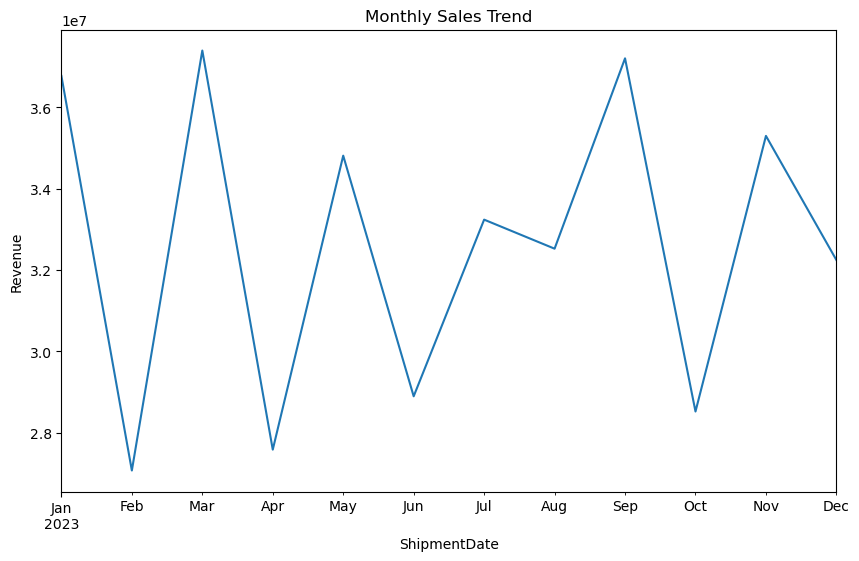

In [45]:
# Line Chart for Monthly Sales Trends
monthly_sales = df.set_index('ShipmentDate').resample('M')['Revenue'].sum()
monthly_sales.plot(kind='line', figsize=(10,6), title='Monthly Sales Trend')
plt.ylabel('Revenue')
plt.show()

In [54]:
# Data Transformation
# Drop unnecessary columns
columns_to_drop = ['ShipmentID']
df = df.drop(columns=columns_to_drop)

In [56]:
# Normalize numerical variables
scaler = StandardScaler()
numeric_cols = ['Quantity', 'UnitCost', 'Revenue', 'DeliveryTime']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [58]:
df.head()

,Product,Quantity,UnitCost,Supplier,Warehouse,ShipmentDate,TransportMode,Destination,Status,DeliveryDate,DeliveryTime,Month,Revenue
0,Monitor,1.616515,-0.406542,NetSys,WH-B,2023-08-14,Rail,Los Angeles,In Transit,2023-08-22,0.845728,2023-08,0.583381
1,Keyboard,1.468496,1.638393,TechCorp,WH-B,2023-08-30,Ship,Los Angeles,Delivered,2023-09-04,-0.179811,2023-08,2.759470
2,Tablet,-0.610828,-1.410358,TechCorp,WH-B,2023-05-21,Truck,Houston,Delivered,2023-05-31,1.529421,2023-05,-1.028763
3,Keyboard,-1.661062,0.672817,Innovatek,WH-B,2023-07-18,Truck,New York,Delayed,2023-07-21,-0.863504,2023-07,-1.087255
4,Keyboard,-0.765896,-0.000535,GadgetPro,WH-B,2023-04-22,Truck,Houston,In Transit,2023-04-30,0.845728,2023-04,-0.517166


In [60]:
#T2

C:\Users\vansh\AppData\Local\Temp\ipykernel_2844\3979379314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Revenue', palette='Set1')


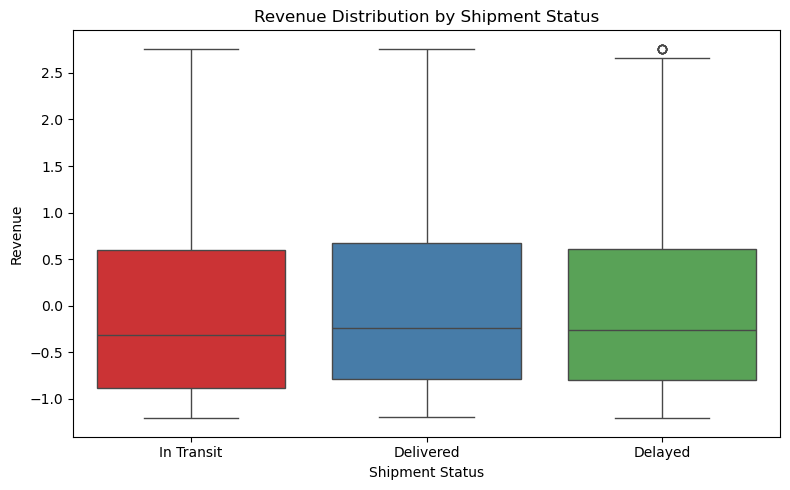

In [64]:
# Create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Status', y='Revenue', palette='Set1')
plt.title('Revenue Distribution by Shipment Status')
plt.xlabel('Shipment Status')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [66]:
#insights
# 1. Higher Revenue in “Delivered” Shipments
# If the "Delivered" category has the highest median and upper range, it may indicate that:

# High-value shipments are being prioritized and successfully delivered.

# The company is efficient at managing more profitable deliveries.

# 2. Lower Revenue in “Delayed” Shipments
# If the "Delayed" category shows lower average or median revenue, it suggests:

# Lower-value shipments are more prone to delays.



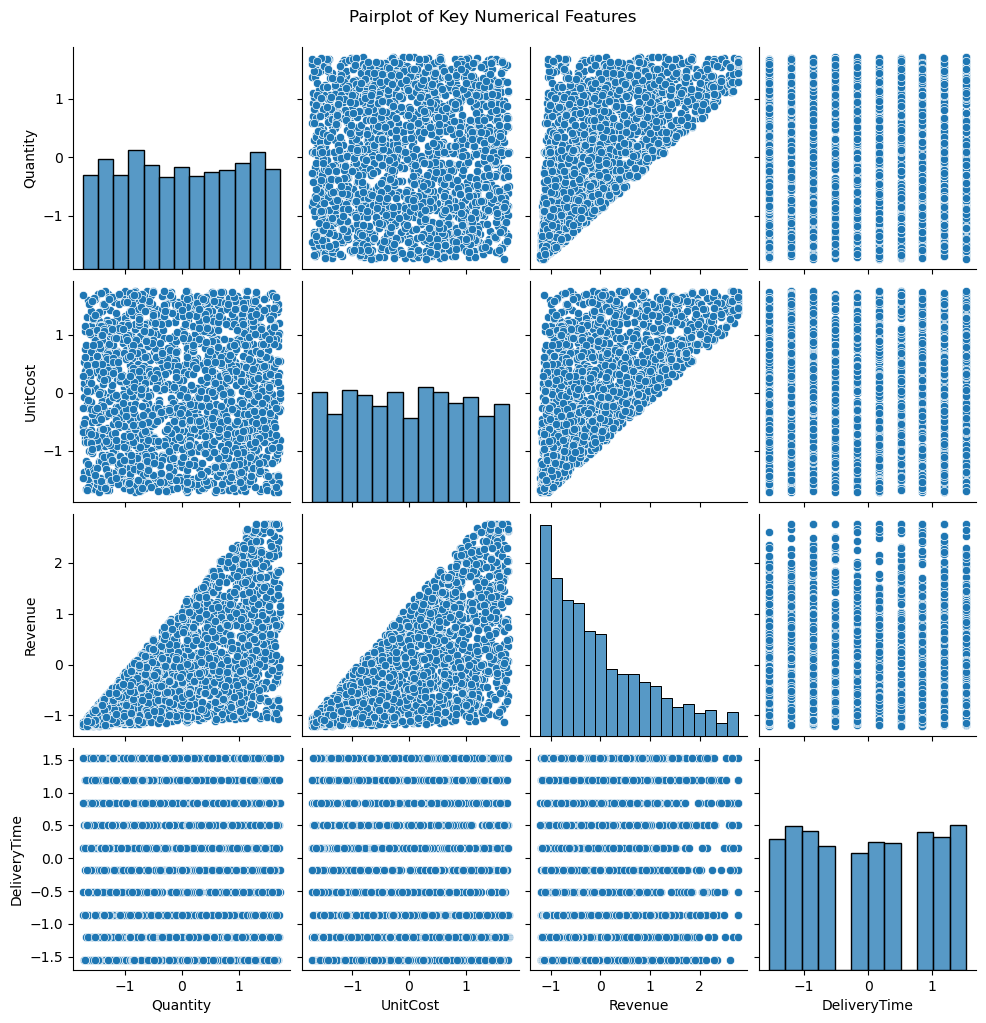

In [72]:
pairplot_data = df[['Quantity', 'UnitCost', 'Revenue', 'DeliveryTime']].dropna()
sns.pairplot(pairplot_data)
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

In [74]:
#insight
# If DeliveryTime doesn't correlate well with Revenue, it indicates delays aren't revenue-driven.

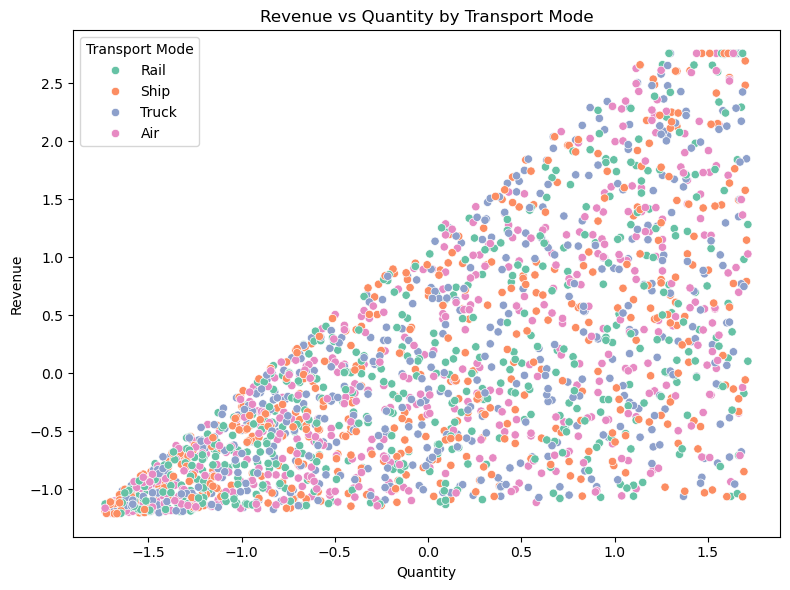

In [78]:
#heatmap
# Compute correlation matrix
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Quantity', y='Revenue', hue='TransportMode', palette='Set2')
plt.title('Revenue vs Quantity by Transport Mode')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(title='Transport Mode')
plt.tight_layout()
plt.show()

In [80]:
#insights
# If Air or Truck clusters in the high-revenue zone, those modes are likely preferred for premium deliveries.

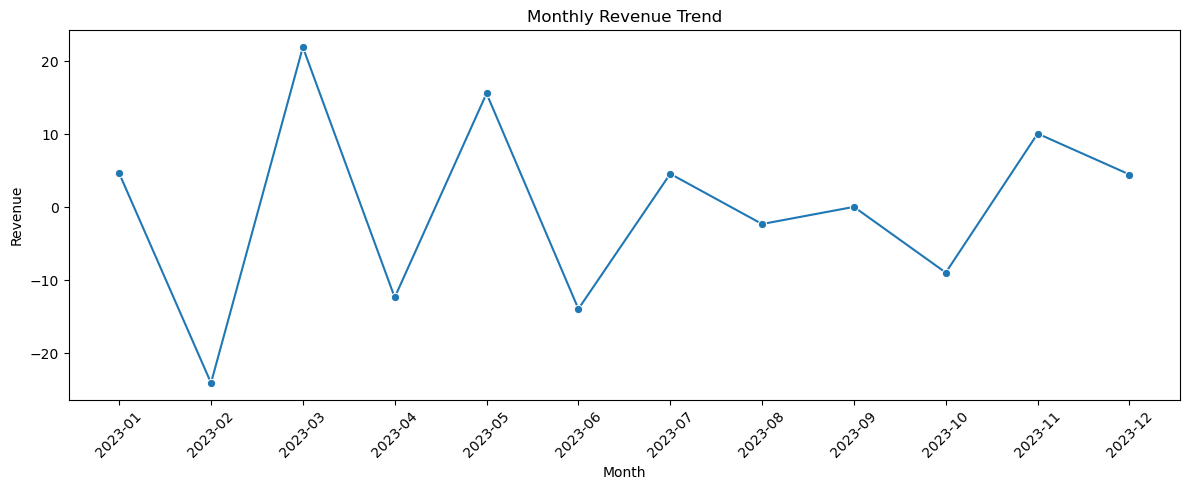

In [84]:
#1. Monthly Revenue Trend
df['Month'] = df['ShipmentDate'].dt.to_period('M').astype(str)
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vansh\AppData\Local\Temp\ipykernel_2844\3445484036.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delivery_supplier.values, y=avg_delivery_supplier.index, palette='crest')


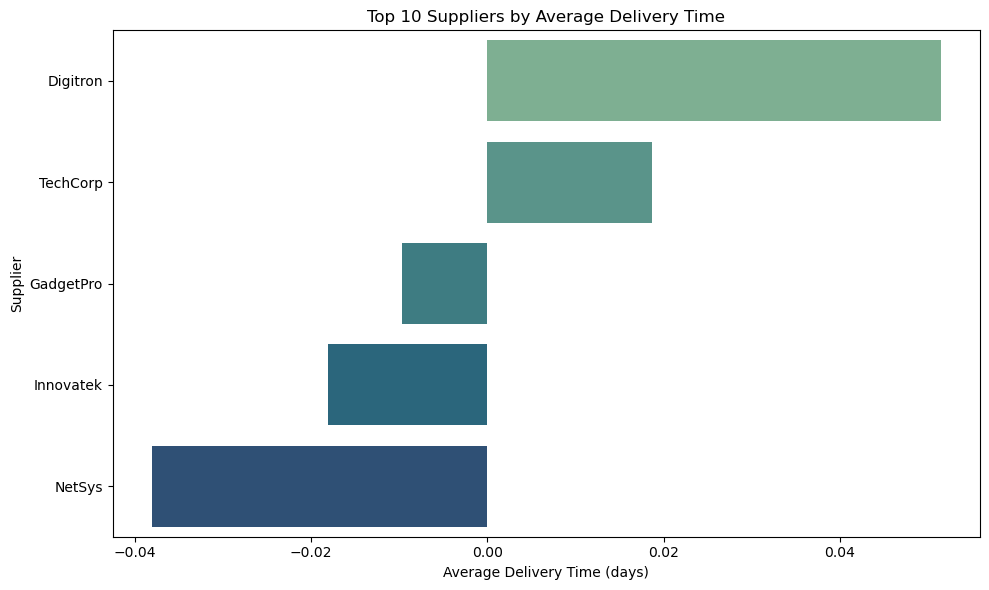

In [86]:
#2. Average Delivery Time per Supplier
avg_delivery_supplier = df.groupby('Supplier')['DeliveryTime'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_delivery_supplier.values, y=avg_delivery_supplier.index, palette='crest')
plt.title('Top 10 Suppliers by Average Delivery Time')
plt.xlabel('Average Delivery Time (days)')
plt.ylabel('Supplier')
plt.tight_layout()
plt.show()

C:\Users\vansh\AppData\Local\Temp\ipykernel_2844\178120167.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='TransportMode', y='Quantity', hue='Status', ci=None, palette='Set2')


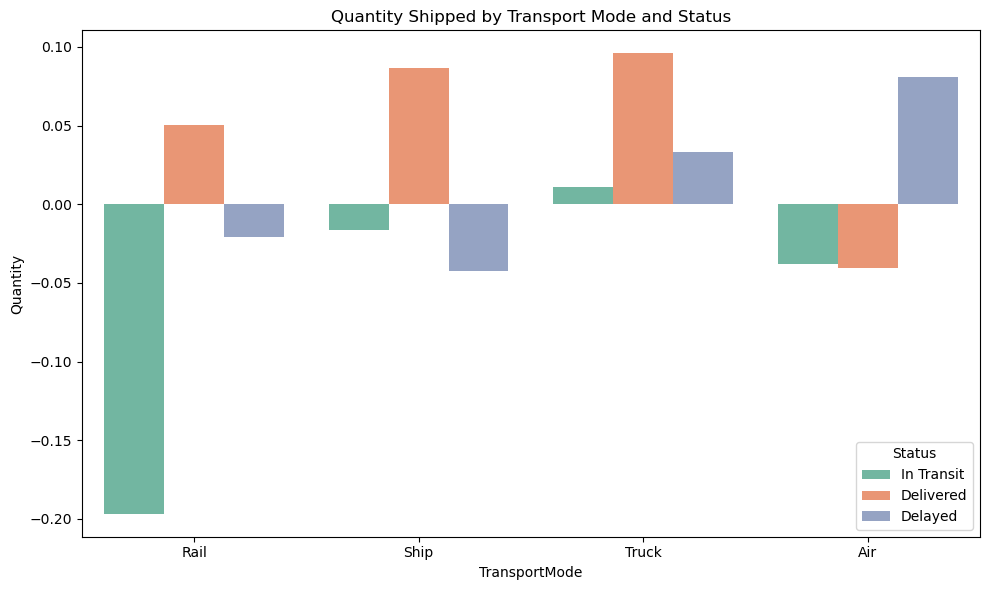

In [88]:
# Quantity by Transport Mode and Status

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='TransportMode', y='Quantity', hue='Status', ci=None, palette='Set2')
plt.title('Quantity Shipped by Transport Mode and Status')
plt.tight_layout()
plt.show()

C:\Users\vansh\AppData\Local\Temp\ipykernel_2844\964472178.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=warehouse_revenue.index, y=warehouse_revenue.values, palette='magma')


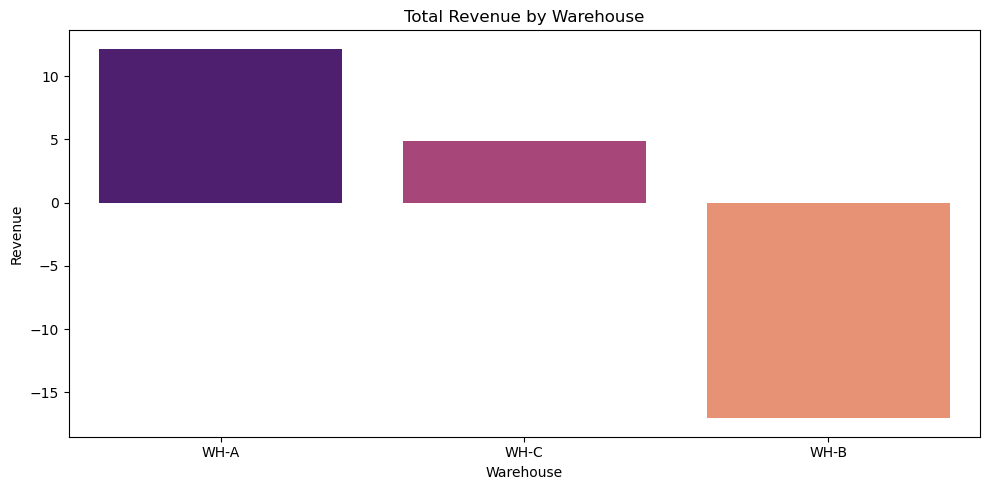

In [90]:
 # Revenue by Warehouse
warehouse_revenue = df.groupby('Warehouse')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=warehouse_revenue.index, y=warehouse_revenue.values, palette='magma')
plt.title('Total Revenue by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()
